In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_data(N):
    """
    Get MNIST images of 3 only, as in the textbook.
    :N:
    :return:
    """
    mnist = np.load('../data/mnist.npz')
    data = mnist['x_train'][mnist['y_train']==3]
    data = data[:N]
    data = data.reshape([N, 28 * 28])
    return data

In [3]:
N = 1000
X = load_data(N)

# sample mean
X_ = np.mean(X, axis=0)

# sample covariance matrix
S = 1/N * np.dot((X-X_).T, (X-X_))

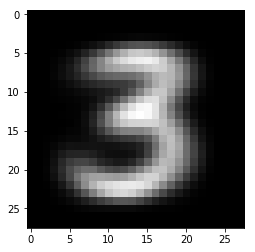

In [4]:
# mean vector, figure 12.3
plt.imshow(X_.reshape([28, 28]), cmap='gray', interpolation='none')

In [5]:
# eigen-decompose sample covmat (SVD on X-X_ works the same)
L, U = np.linalg.eig(S)  # eigenvalues, eigenvectors

In [6]:
# somehow numpy returns complex results (but with zero imaginary parts); we can safely cast to floats b/c
# we know the covmat is PSD and always has real eigen-values/vectors.
L = np.float64(L)
U = np.float64(U)

# sort the eigen-value/vector pairs by decreasing eigenvalues
idx = L.argsort()[::-1]   
L = L[idx]
U = U[:,idx]

/home/yibo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/home/yibo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: ComplexWarning: Casting complex values to real discards the imaginary part


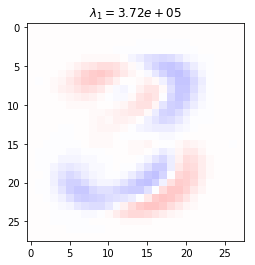

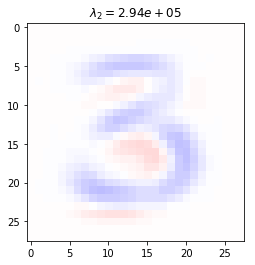

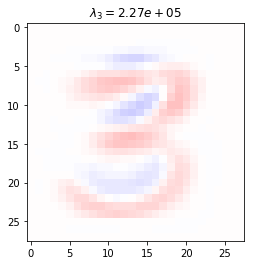

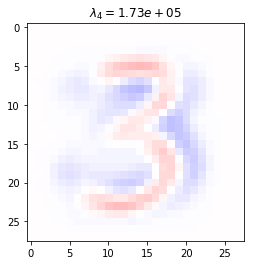

In [7]:
# visualize top 4 eigenvectors, figure 12.3
for i in range(4):
    plt.figure()
    plt.imshow(U[:, i].reshape([28, 28]), vmin=-1, vmax=1, cmap='seismic', interpolation='none')
    plt.title('$\lambda_%d=%.2e$' %((i+1), L[i]))

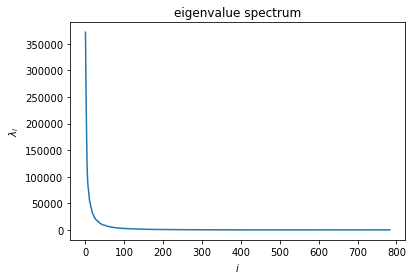

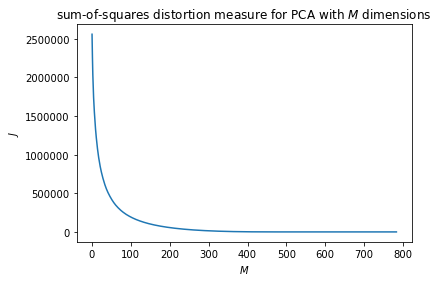

In [8]:
# figure 12.4
plt.figure()
plt.plot(L)
plt.xlabel('$i$')
plt.ylabel('$\lambda_i$')
plt.title('eigenvalue spectrum')

J_cum = L.sum()-np.cumsum(L)  # the minimized J[m] found by PCA is the sum of the D-M smallest eigenvalues (12.18)
plt.figure()
plt.plot(J_cum)
plt.xlabel('$M$')
plt.ylabel('$J$')
plt.title('sum-of-squares distortion measure for PCA with $M$ dimensions')

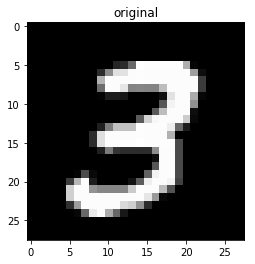

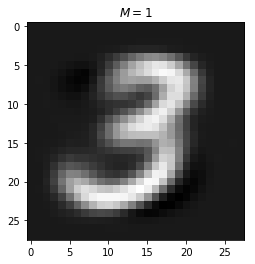

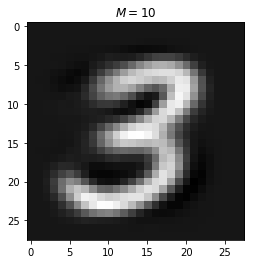

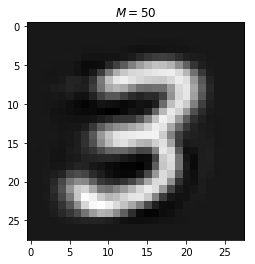

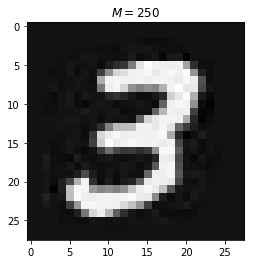

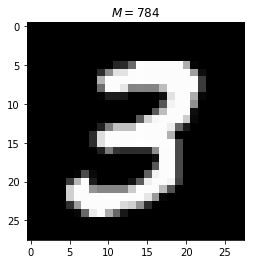

In [18]:
# figure 12.5, PCA reconstruction; the reconstruction is perfect when M=D=784
x = X[0].astype(np.float64)
plt.imshow(x.reshape([28, 28]), cmap='gray', interpolation='none')
plt.title('original')

x -= X_
for M in (1, 10, 50, 250, 784):
    U_M = U[:, :M]
    z = np.dot(U_M.T, x)    # coordinates in the eigen-basis
    x_tilde = X_ + np.dot(U_M, z)    # eq (12.20), p.566
    plt.figure()
    plt.imshow(x_tilde.reshape([28, 28]), cmap='gray', interpolation='none')
    plt.title('$M=%d$' %M)